In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df_cleaned = application_df.drop(columns = ["EIN", "NAME"])
application_df_cleaned.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df_cleaned.nunique()

,0
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747
IS_SUCCESSFUL,2


In [4]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_count = application_df_cleaned["APPLICATION_TYPE"].value_counts()
application_type_count

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_type_count[application_type_count < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [6]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_count = application_df_cleaned["CLASSIFICATION"].value_counts()
classification_count

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C1248,1
C6100,1
C1820,1


In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count_greater_than_one = classification_count[classification_count > 1]
classification_count_greater_than_one

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_count[classification_count < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
Other,2261
C3000,1918
C2100,1883


In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_dummies = pd.get_dummies(application_df_cleaned)
application_df_dummies.head(5)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [40]:
# Split our preprocessed data into our features and target arrays
y = application_df_dummies["IS_SUCCESSFUL"]
X = application_df_dummies.drop(columns = "IS_SUCCESSFUL", axis =1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

In [41]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Optimize the Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
# Another attempt with adding third hidden layer

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features =  X_train_scaled.shape[1]
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 30

nn = Sequential()

# First hidden layer
nn.add(Dense(units = hidden_nodes_layer1, input_dim = num_input_features, activation = "relu"))

# Second hidden layer
nn.add(Dense(units = hidden_nodes_layer2, activation = "relu"))

# Third hidden layer
nn.add(Dense(units = hidden_nodes_layer3, activation = "relu"))

# Output layer
nn.add(Dense(units = 1, activation = "sigmoid"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 120)            │        14,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 60)             │         7,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,161 (90.47 KB)

 Trainable params: 23,161 (90.47 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
nn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [15]:
# Train the model
model_fitted = nn.fit(X_train_scaled, y_train, epochs = 25)

Epoch 1/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7080 - loss: 0.5852
Epoch 2/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7310 - loss: 0.5464
Epoch 3/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7295 - loss: 0.5498
Epoch 4/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7363 - loss: 0.5456
Epoch 5/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7357 - loss: 0.5441
Epoch 6/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7345 - loss: 0.5423
Epoch 7/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7388 - loss: 0.5388
Epoch 8/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7336 - loss: 0.5463
Epoch 9/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7392 - loss: 0.5387
Epoch 10/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7381 - loss: 0.5369
Epoch 11/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7388 - loss: 0.5363
Epoch 12/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

In [16]:
model_fitted.history.keys()

dict_keys(['accuracy', 'loss'])

In [17]:
model_fitted_df = pd.DataFrame(model_fitted.history)

In [18]:
model_fitted_df.tail(3)

,accuracy,loss
22,0.739387,0.536068
23,0.739815,0.535298
24,0.740281,0.535371


In [19]:
import matplotlib.pyplot as plt

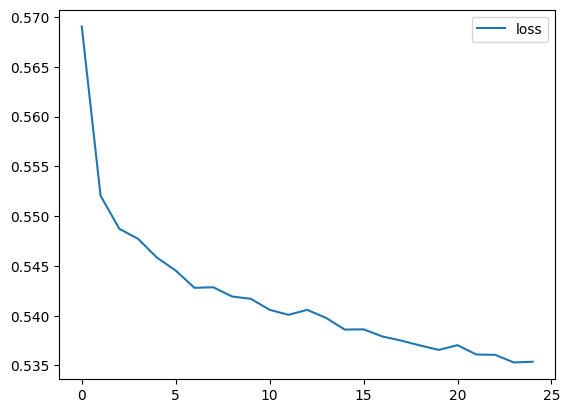

In [20]:
model_fitted_df.plot(y = "loss")
plt.show()

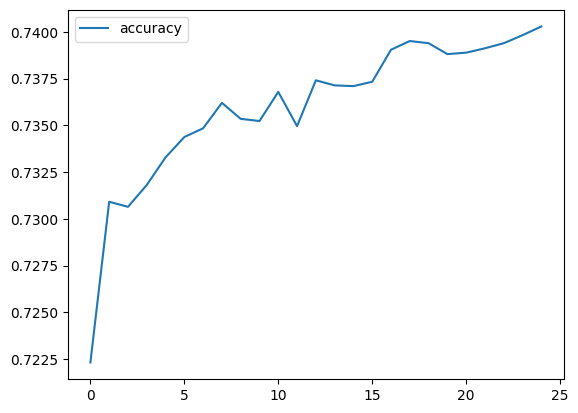

In [21]:
model_fitted_df.plot(y = "accuracy")
plt.show()

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 2ms/step - accuracy: 0.7294 - loss: 0.5551
Loss: 0.5550702214241028, Accuracy: 0.7294460535049438


In [23]:
# Another attempt with different activation function

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features =  X_train_scaled.shape[1]
hidden_nodes_layer1 = 128
hidden_nodes_layer2 = 64
hidden_nodes_layer3 = 33

nn = Sequential()

# First hidden layer
nn.add(Dense(units = hidden_nodes_layer1, input_dim = num_input_features, activation = "tanh"))

# Second hidden layer
nn.add(Dense(units = hidden_nodes_layer2, activation = "tanh"))

# Third hidden layer
nn.add(Dense(units = hidden_nodes_layer3, activation = "tanh"))

# Output layer
nn.add(Dense(units = 1, activation = "hard_sigmoid"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │        14,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 33)             │         2,145 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,411 (99.26 KB)

 Trainable params: 25,411 (99.26 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compile the model
nn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [25]:
# Train the model
model_fitted = nn.fit(X_train_scaled, y_train, epochs = 25)

Epoch 1/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7065 - loss: 0.5853
Epoch 2/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7298 - loss: 0.5534
Epoch 3/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7327 - loss: 0.5506
Epoch 4/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7343 - loss: 0.5471
Epoch 5/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7356 - loss: 0.5423
Epoch 6/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7394 - loss: 0.5395
Epoch 7/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7384 - loss: 0.5451
Epoch 8/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7379 - loss: 0.5452
Epoch 9/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7364 - loss: 0.5461
Epoch 10/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7392 - loss: 0.5400
Epoch 11/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7400 - loss: 0.5373
Epoch 12/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.7307 - loss: 0.5548
Loss: 0.5547965168952942, Accuracy: 0.7307288646697998


In [50]:
# Another attempt with different activation function

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features =  len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 30

nn = Sequential()

# First hidden layer
nn.add(Dense(units = hidden_nodes_layer1, input_dim = num_input_features, activation = "leaky_relu"))

# Second hidden layer
nn.add(Dense(units = hidden_nodes_layer2, activation = "leaky_relu"))

# Third hidden layer
nn.add(Dense(units = hidden_nodes_layer3, activation = "leaky_relu"))

# Output layer
nn.add(Dense(units = 1, activation = "sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 10)             │         1,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,051 (8.01 KB)

 Trainable params: 2,051 (8.01 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Compile the model
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate as needed
nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [52]:
# Train the model
model_fitted = nn.fit(X_train_scaled, y_train, epochs = 25)

Epoch 1/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.6851 - loss: 0.6118
Epoch 2/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7241 - loss: 0.5616
Epoch 3/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7260 - loss: 0.5554
Epoch 4/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7307 - loss: 0.5512
Epoch 5/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7334 - loss: 0.5503
Epoch 6/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7384 - loss: 0.5432
Epoch 7/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7301 - loss: 0.5480
Epoch 8/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7366 - loss: 0.5412
Epoch 9/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7364 - loss: 0.5438
Epoch 10/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7360 - loss: 0.5401
Epoch 11/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7346 - loss: 0.5430
Epoch 12/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/ste

In [53]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 2ms/step - accuracy: 0.7326 - loss: 0.5507
Loss: 0.5507299304008484, Accuracy: 0.7325947284698486


In [54]:
from tensorflow.keras.models import load_model

In [55]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")